# Making `GIF`s of Rotations

In [1]:
%matplotlib inline

In [2]:
import images2gif as i2g

In [3]:
?i2g.writeGif

In [4]:
from projections import transform_map
from projections import rotationFromXYZ

In [5]:
import numpy as np
from copy import deepcopy 
import matplotlib.pyplot as plt
from scipy import misc

In [6]:
lights_map = misc.imread('/Users/pfoley/map_projections/input_images/land_ocean_ice_lights_2048.tif')

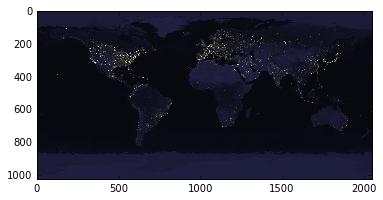

In [7]:
plt.imshow(lights_map)

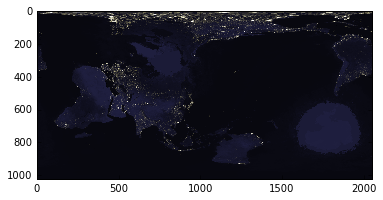

In [8]:
rand_lights = transform_map(lights_map, 
                            rotationFromXYZ(*np.random.uniform(low = 0.0, high = 2 * np.pi, size = 3)),
                            in_projection = 'platecarre', out_projection = 'platecarre',
                            debug = False)

##  Making a `GIF`

In [ ]:
n_frames = 60

axis_vector = np.random.randn(3)
axis_vector

In [ ]:
axis_vector = axis_vector / np.sqrt(sum(axis_vector**2))

In [ ]:
axis_vector

In [ ]:
sum(axis_vector**2)

In [9]:
from projections import rotationMatrix

In [ ]:
angles = list(np.linspace(0.0, 2*np.pi, n_frames))

In [ ]:
angles

In [ ]:
rotation_matrices = [rotationMatrix(axis_vector, angle) for angle in angles]

In [ ]:
projected_maps = [transform_map(lights_map, rotation,
                              in_projection = 'platecarre',
                              out_projection = 'platecarre',
                              debug = False) 
                  for rotation 
                  in rotation_matrices]

In [ ]:
i2g.writeGif('/Users/pfoley/Desktop/globe_rotation4.gif', 
            projected_maps, duration = 10.0 / n_frames, subRectangles = False)

In [10]:
from images3gif import writeGif as writeGif2

In [ ]:
writeGif2('/Users/pfoley/Desktop/globe_rotation4.gif', 
            projected_maps, duration = 10.0 / n_frames, subRectangles = False)

In [ ]:
writeGif2('/Users/pfoley/Desktop/globe_rotation5.gif', 
            projected_maps, duration = 10.0 / n_frames, subRectangles = False)

In [11]:
def make_movie(filename, input_map, 
               in_projection = 'platecarre', out_projection = 'platecarre', 
               n_frames = 60, n_seconds = 10.0):
    angles = list(np.linspace(0.0, 2*np.pi, n_frames))
    rotation_matrices = [rotationMatrix(axis_vector, angle) for angle in angles]
    
    projected_maps = [transform_map(input_map, rotation,
                              in_projection = in_projection,
                              out_projection = out_projection,
                              debug = False) 
                  for rotation 
                  in rotation_matrices]
    
    writeGif2(filename, projected_maps, 
              duration = n_seconds / n_frames, subRectangles = False)

In [ ]:
axis_vector = np.random.randn(3)
axis_vector = axis_vector / np.sqrt(sum(axis_vector**2))
axis_vector

In [ ]:
make_movie('/Users/pfoley/Desktop/rand_big_movie.gif',
           lights_map, n_frames = 600, n_seconds = 16.0)

##  A HUUUUUUGE Movie

In [12]:
hugemap = misc.imread('/Users/pfoley/Desktop/world.topo.200412.3x5400x2700_snow_platecarre.jpg')

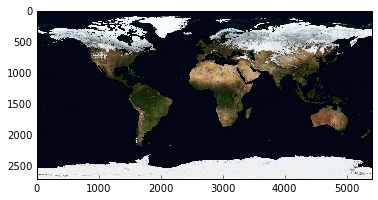

In [13]:
plt.imshow(hugemap)

In [14]:
axis_vector = np.random.randn(3)
axis_vector = axis_vector / np.sqrt(sum(axis_vector**2))
axis_vector

array([ 0.86787029, -0.45206855, -0.205998  ])

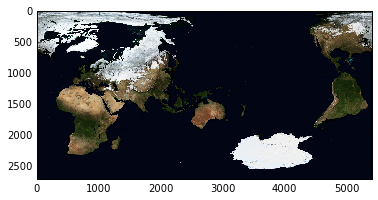

In [15]:
rand_huge = transform_map(hugemap, 
                            rotationFromXYZ(*np.random.uniform(low = 0.0, high = 2 * np.pi, size = 3)),
                            in_projection = 'platecarre', out_projection = 'platecarre',
                            debug = False)

In [17]:
misc.imsave('/Users/pfoley/Desktop/hugesnow.jpg', rand_huge)

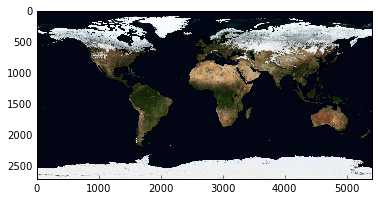

In [19]:
make_movie('/Users/pfoley/Desktop/rand_huge_movie2.gif',
           hugemap, n_frames = 300, n_seconds = 16.0)